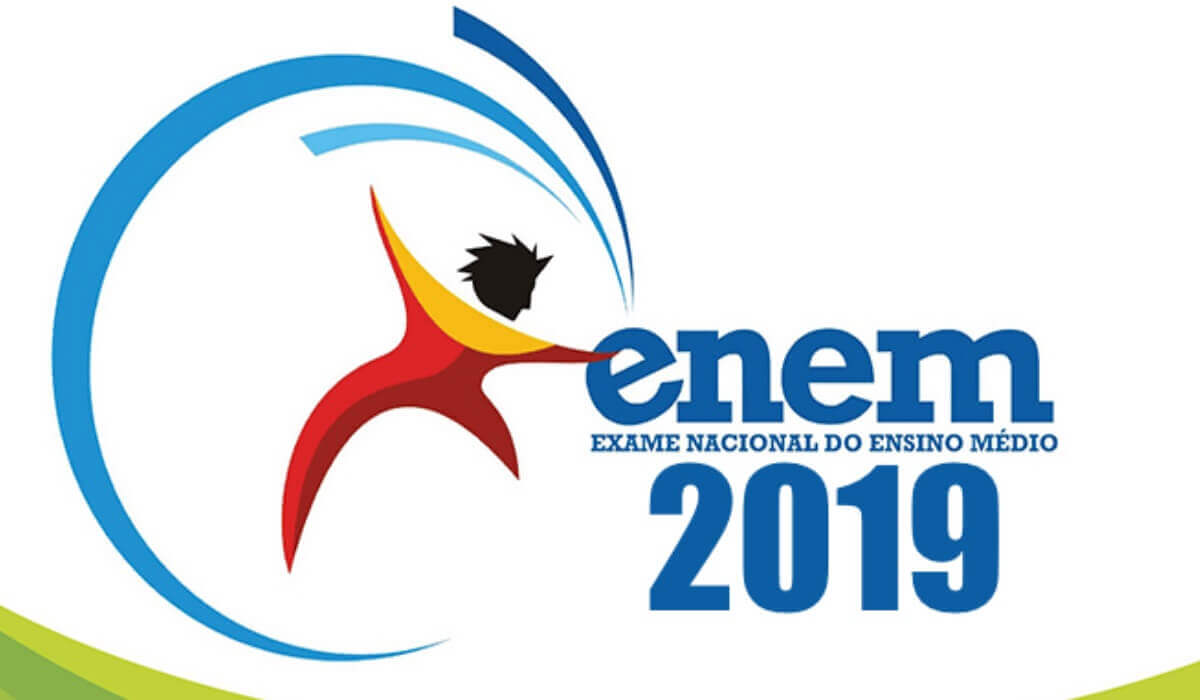

# Introdução

O Exame Nacional do Ensino Médio (Enem), é uma prova realizada pelo Instituto Nacional de Estudos e Pesquisas Educacionais Anísio Teixeira (INEP), autarquia vinculada ao Ministério da Educação do Brasil, e foi criada em 1998. Ela é utilizada para avaliar a qualidade do ensino médio no país. Seu resultado serve para acesso ao ensino superior em universidades públicas brasileiras, através do Sistema de Seleção Unificada (SiSU), assim como em algumas universidades no exterior.

# Sobre este estudo

Neste estudo, estarei utilizando os micros dados do Enem 2019, disponível no site do governo (http://inep.gov.br/web/guest/microdados).

Para esse estudo utilizarei do dataset:

MICRODADOS_ENEM_2019.csv: Possui dados diversos sobre os alunos que participaram da prova do Enem 2019. 

Não será utilizado todos os dados disponíveis no arquivo, e para tentar deixar o arquivo um pouco mais leve, realizaremos uma limpeza nas colunas que não iremos utilizar.


# Perguntas a serem respondidas

- Qual Estado possui mais candidatos?
- Qual Estado Possui maior média do Brasil? 
- Possível causa desse Estado possuir a maior média do Brasil.
- Qual a média entre os sexos Masculinos e Femininos?
- Qual a média entre os candidatos separados por Cor/Raça?
- Qual a média entre os candidatos separados por Renda?
- Qual a média entre os candidatos separados pelo tipo de Escola (Particular, publica ou exterior)?
- Qual a média entre os candidatos separados pela escolaridade do pai/homem responsável?
- Qual o número de presença e faltas na prova de matematica por estado?
- Analise das notas separados por competências na redação.


# Bibiotecas utilizadas

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import plotly.offline as py
import plotly.graph_objs as go
py.init_notebook_mode(connected=True)


# Leitura do DataSet

In [2]:
df = pd.read_csv('MICRODADOS_ENEM_2019.csv',sep = ';', encoding="ISO-8859-1")

In [3]:
pd.set_option('max_columns', None) #comando para aparecer todas as colunas sem os truncamentos

In [4]:
pd.set_option('max_rows', None) #comando para mostrar todas as linhas sem os truncamentos

# Limpeza dos dados (Data Cleaning)

Aqui iremos realizar a limpeza de colunas que nao utilizares para o nosso estudo. Vamos inicialmente verificar como o DataSet esta apresentado. (Ver o dicionário disponível nos arquivos do GitHub).

In [5]:
df.head(100)

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_ESCOLA,CO_MUNICIPIO_ESC,NO_MUNICIPIO_ESC,CO_UF_ESC,SG_UF_ESC,TP_DEPENDENCIA_ADM_ESC,TP_LOCALIZACAO_ESC,TP_SIT_FUNC_ESC,IN_BAIXA_VISAO,IN_CEGUEIRA,IN_SURDEZ,IN_DEFICIENCIA_AUDITIVA,IN_SURDO_CEGUEIRA,IN_DEFICIENCIA_FISICA,IN_DEFICIENCIA_MENTAL,IN_DEFICIT_ATENCAO,IN_DISLEXIA,IN_DISCALCULIA,IN_AUTISMO,IN_VISAO_MONOCULAR,IN_OUTRA_DEF,IN_GESTANTE,IN_LACTANTE,IN_IDOSO,IN_ESTUDA_CLASSE_HOSPITALAR,IN_SEM_RECURSO,IN_BRAILLE,IN_AMPLIADA_24,IN_AMPLIADA_18,IN_LEDOR,IN_ACESSO,IN_TRANSCRICAO,IN_LIBRAS,IN_TEMPO_ADICIONAL,IN_LEITURA_LABIAL,IN_MESA_CADEIRA_RODAS,IN_MESA_CADEIRA_SEPARADA,IN_APOIO_PERNA,IN_GUIA_INTERPRETE,IN_COMPUTADOR,IN_CADEIRA_ESPECIAL,IN_CADEIRA_CANHOTO,IN_CADEIRA_ACOLCHOADA,IN_PROVA_DEITADO,IN_MOBILIARIO_OBESO,IN_LAMINA_OVERLAY,IN_PROTETOR_AURICULAR,IN_MEDIDOR_GLICOSE,IN_MAQUINA_BRAILE,IN_SOROBAN,IN_MARCA_PASSO,IN_SONDA,IN_MEDICAMENTOS,IN_SALA_INDIVIDUAL,IN_SALA_ESPECIAL,IN_SALA_ACOMPANHANTE,IN_MOBILIARIO_ESPECIFICO,IN_MATERIAL_ESPECIFICO,IN_NOME_SOCIAL,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TX_RESPOSTAS_CN,TX_RESPOSTAS_CH,TX_RESPOSTAS_LC,TX_RESPOSTAS_MT,TP_LINGUA,TX_GABARITO_CN,TX_GABARITO_CH,TX_GABARITO_LC,TX_GABARITO_MT,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,4,NaN,NaN,NaN,NaN,1,3,1,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1506807,Santarém,15,PA,1,1,1,1,504.0,509.0,514.0,516.0,472.9,466.0,497.3,369.1,DECCEBAECBDADCDBBACEBECCBECBECDDDCBCAADBEDCDA,CCBCAEDAAECEDABEDAAADEDBBEDACDCDDCBBCCEBBAACB,DBBCB99999BDCCDBBABBAAADCBEBAEBBAAEBCCCABDCCBA...,ADBBDEDCABCEDCACBECDCCEBCCDBEBDCEDDBCDBCCDECC,0,BEEAAEBEEBADEADDADAEABCEDDDBCBCBCCACBCDADCCEB,ACACEEBCCBABADBBBACDBBACCCCADCEBADCBEEDBBEADB,EBBADCABDABACBCEBDEEAAADDBECDECDDBADBCDAAECBCC...,BEDEEEAADBEBACABCDBABECECACADCBDCCEDCDABECDDD,1.0,160.0,160.0,160.0,140.0,160.0,780.0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,1,1505502.0,Paragominas,15.0,PA,3,0,1,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1504059,Mãe do Rio,15,PA,1,1,1,1,506.0,510.0,513.0,517.0,358.9,495.4,482.3,416.5,DAEDEBDCDEBAAACDADABDACABECDAEAAAADCEBBADEBDE,CEACBBDEEABDDACADDAABCEAEEDEEBCACEDBBDBBDBACE,99999ADBEAEBDACDAADEBBDABAEADCDDACABCCAABEEAEE...,DACCCBDCCCBACCCCEEEBBBEACCAABDBACDCAECABCCDBE,1,DEADBAAAEBEECEBCBCBCBDADAEABCEDDDDADCBEECACBC,EEBCEEDBADBBCBABCCADCEBACDBBACCACACBEADBBADCB,ADBBEDCABAABBCBCDAAECDDDBAAAECADECDCEBDEEAECBD...,AADDDBEEEBEDDBEBACABCDBABECECACAECDCBDCCEDCDA,1.0,120.0,120.0,120.0,120.0,120.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,1,1505502.0,Paragominas,15.0,PA,2,0,3,1.0,0,15230023.0,1505502.0,Paragominas,15.0,PA,4.0,1.0,1.0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1505502,Paragominas,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,AABDAECAECECCBCBDECCCBCDBBABABADACBDEADEDABEE,ABACCEABCDADABACBBCEACDACDBBEEBACABBAEACAADCE,ADBBC99999EDBCBBAACECCDCDAACECAABCDCCEDEBAECEA...,DECCABCBCDBBBEAECBDBBCDDAADEBCBCACBBEDADDEEAC,0,DADCCEBBCCACBEEBEEBACBCDDDDADBCBBCEAEADEADAAE,EEBCEEDBADBBCBABCCADCE

In [6]:
#numero de linhas e colunas
df.shape

(5095270, 136)

In [7]:
#retirando Colunas nao utilizadas.


In [8]:
df = df.drop(columns=['CO_ESCOLA',"CO_MUNICIPIO_ESC","NO_MUNICIPIO_ESC","CO_UF_ESC","SG_UF_ESC","TP_DEPENDENCIA_ADM_ESC","TP_LOCALIZACAO_ESC","TP_SIT_FUNC_ESC", 'IN_BAIXA_VISAO','IN_CEGUEIRA','IN_SURDEZ','IN_DEFICIENCIA_AUDITIVA','IN_SURDO_CEGUEIRA','IN_DEFICIENCIA_FISICA','IN_DEFICIENCIA_MENTAL','IN_DEFICIT_ATENCAO','IN_DISLEXIA','IN_DISCALCULIA','IN_AUTISMO','IN_VISAO_MONOCULAR','IN_OUTRA_DEF', 'IN_GESTANTE','IN_LACTANTE','IN_IDOSO','IN_ESTUDA_CLASSE_HOSPITALAR', 'IN_SEM_RECURSO','IN_BRAILLE','IN_AMPLIADA_24','IN_AMPLIADA_18','IN_LEDOR','IN_ACESSO','IN_TRANSCRICAO','IN_LIBRAS','IN_TEMPO_ADICIONAL','IN_LEITURA_LABIAL','IN_MESA_CADEIRA_RODAS','IN_MESA_CADEIRA_SEPARADA','IN_APOIO_PERNA','IN_GUIA_INTERPRETE','IN_COMPUTADOR','IN_CADEIRA_ESPECIAL','IN_CADEIRA_CANHOTO','IN_CADEIRA_ACOLCHOADA','IN_PROVA_DEITADO','IN_MOBILIARIO_OBESO','IN_LAMINA_OVERLAY','IN_PROTETOR_AURICULAR','IN_MEDIDOR_GLICOSE','IN_MAQUINA_BRAILE','IN_SOROBAN','IN_MARCA_PASSO','IN_SONDA','IN_MEDICAMENTOS','IN_SALA_INDIVIDUAL','IN_SALA_ESPECIAL','IN_SALA_ACOMPANHANTE','IN_MOBILIARIO_ESPECIFICO','IN_MATERIAL_ESPECIFICO','IN_NOME_SOCIAL', 'TX_RESPOSTAS_CN','TX_RESPOSTAS_CH','TX_RESPOSTAS_LC','TX_RESPOSTAS_MT','TX_GABARITO_CN','TX_GABARITO_CH','TX_GABARITO_LC','TX_GABARITO_MT' ])

In [9]:
df.shape

(5095270, 69)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5095270 entries, 0 to 5095269
Data columns (total 69 columns):
 #   Column                   Dtype  
---  ------                   -----  
 0   NU_INSCRICAO             int64  
 1   NU_ANO                   int64  
 2   CO_MUNICIPIO_RESIDENCIA  int64  
 3   NO_MUNICIPIO_RESIDENCIA  object 
 4   CO_UF_RESIDENCIA         int64  
 5   SG_UF_RESIDENCIA         object 
 6   NU_IDADE                 int64  
 7   TP_SEXO                  object 
 8   TP_ESTADO_CIVIL          int64  
 9   TP_COR_RACA              int64  
 10  TP_NACIONALIDADE         int64  
 11  CO_MUNICIPIO_NASCIMENTO  float64
 12  NO_MUNICIPIO_NASCIMENTO  object 
 13  CO_UF_NASCIMENTO         float64
 14  SG_UF_NASCIMENTO         object 
 15  TP_ST_CONCLUSAO          int64  
 16  TP_ANO_CONCLUIU          int64  
 17  TP_ESCOLA                int64  
 18  TP_ENSINO                float64
 19  IN_TREINEIRO             int64  
 20  CO_MUNICIPIO_PROVA       int64  
 21  NO_MUNIC

In [11]:
df.head()

,NU_INSCRICAO,NU_ANO,CO_MUNICIPIO_RESIDENCIA,NO_MUNICIPIO_RESIDENCIA,CO_UF_RESIDENCIA,SG_UF_RESIDENCIA,NU_IDADE,TP_SEXO,TP_ESTADO_CIVIL,TP_COR_RACA,TP_NACIONALIDADE,CO_MUNICIPIO_NASCIMENTO,NO_MUNICIPIO_NASCIMENTO,CO_UF_NASCIMENTO,SG_UF_NASCIMENTO,TP_ST_CONCLUSAO,TP_ANO_CONCLUIU,TP_ESCOLA,TP_ENSINO,IN_TREINEIRO,CO_MUNICIPIO_PROVA,NO_MUNICIPIO_PROVA,CO_UF_PROVA,SG_UF_PROVA,TP_PRESENCA_CN,TP_PRESENCA_CH,TP_PRESENCA_LC,TP_PRESENCA_MT,CO_PROVA_CN,CO_PROVA_CH,CO_PROVA_LC,CO_PROVA_MT,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,TP_LINGUA,TP_STATUS_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP2,NU_NOTA_COMP3,NU_NOTA_COMP4,NU_NOTA_COMP5,NU_NOTA_REDACAO,Q001,Q002,Q003,Q004,Q005,Q006,Q007,Q008,Q009,Q010,Q011,Q012,Q013,Q014,Q015,Q016,Q017,Q018,Q019,Q020,Q021,Q022,Q023,Q024,Q025
0,190001004627,2019,1506807,Santarém,15,PA,21,M,1,3,4,NaN,NaN,NaN,NaN,1,3,1,NaN,0,1506807,Santarém,15,PA,1,1,1,1,504.0,509.0,514.0,516.0,472.9,466.0,497.3,369.1,0,1.0,160.0,160.0,160.0,140.0,160.0,780.0,D,E,A,A,7,B,A,B,C,A,A,B,A,B,A,A,A,A,C,B,A,D,A,B,A
1,190001004628,2019,1504059,Mãe do Rio,15,PA,16,F,1,3,1,1505502.0,Paragominas,15.0,PA,3,0,1,NaN,1,1504059,Mãe do Rio,15,PA,1,1,1,1,506.0,510.0,513.0,517.0,358.9,495.4,482.3,416.5,1,1.0,120.0,120.0,120.0,120.0,120.0,600.0,D,E,A,A,5,B,A,B,C,A,A,B,A,B,A,A,A,A,B,B,A,B,A,A,A
2,190001004629,2019,1505502,Paragominas,15,PA,18,F,1,1,1,1505502.0,Paragominas,15.0,PA,2,0,3,1.0,0,1505502,Paragominas,15,PA,1,1,1,1,505.0,510.0,513.0,518.0,574.2,538.7,582.6,571.5,0,1.0,140.0,120.0,120.0,140.0,120.0,640.0,H,E,A,D,3,C,D,E,E,C,A,B,C,B,A,B,A,A,D,B,B,D,A,C,B
3,190001004630,2019,1507706,São Sebastião da Boa Vista,15,PA,23,M,0,3,1,1501402.0,Belém,15.0,PA,2,0,2,1.0,0,1507706,São Sebastião da Boa Vista,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,D,D,A,B,3,C,A,B,C,A,A,B,A,A,A,A,A,A,C,A,A,D,A,A,A
4,190001004631,2019,1503903,Juruti,15,PA,23,M,1,3,1,1503903.0,Juruti,15.0,PA,1,5,1,1.0,0,1503903,Juruti,15,PA,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,B,C,A,A,5,C,A,C,B,A,B,B,A,B,A,A,A,A,B,A,A,D,A,A,A


# 2 - Numero de Inscritos Por Estado

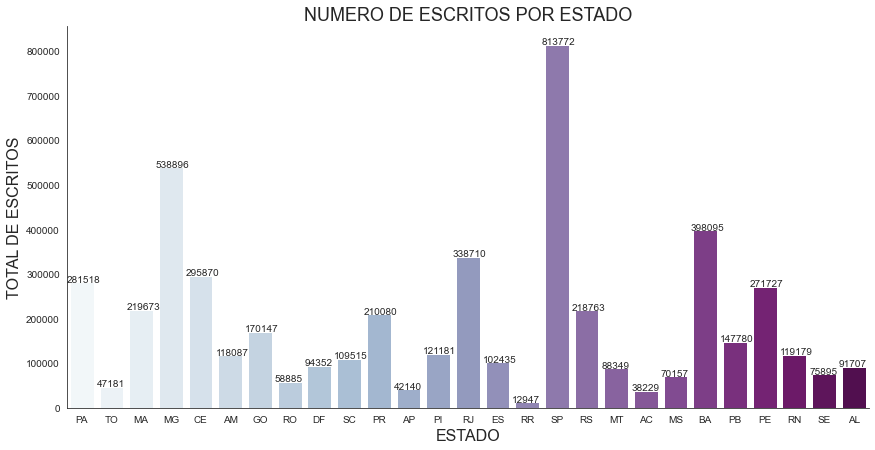

In [12]:
sns.set_style("white")
g = sns.catplot(x="SG_UF_RESIDENCIA", data=df, kind="count", palette="BuPu", height=6, aspect=2)
g.ax.xaxis.set_label_text("ESTADO",fontdict= {'size':16})
g.ax.yaxis.set_label_text("TOTAL DE ESCRITOS", fontdict= {'size':16})
g.ax.set_title("NUMERO DE ESCRITOS POR ESTADO",fontdict= {'size':18})

for p in g.ax.patches:
    g.ax.annotate((p.get_height()), (p.get_x()-0.1, p.get_height()+500))

# 3 - Media das notas por Estado

In [13]:
#Calculo da média das notas
df['Media'] = (df['NU_NOTA_MT']+df['NU_NOTA_LC']+ df['NU_NOTA_CH']+df['NU_NOTA_CN']+df['NU_NOTA_REDACAO'])/5 


In [14]:
colunas_media = ['SG_UF_RESIDENCIA','NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','Media'] 
#seleção das colunas de notas e media 

In [15]:
df_media = df.filter(items = colunas_media) 
#novo dataframe com as colunas selecionadas

In [16]:
df_media.head(1000)

,SG_UF_RESIDENCIA,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Media
0,PA,472.9,466.0,497.3,369.1,517.06
1,PA,358.9,495.4,482.3,416.5,470.62
2,PA,574.2,538.7,582.6,571.5,581.40
3,PA,NaN,NaN,NaN,NaN,NaN
4,PA,NaN,NaN,NaN,NaN,NaN
5,PA,522.0,592.6,582.0,605.3,576.38
6,PA,407.4,480.1,464.3,581.5,458.66
7,PA,369.7,398.2,395.6,473.8,423.46
8,PA,370.7,386.4,354.2,375.5,389.36
9,PA,443.5,432.4,515.3,397.0,465.64


vamos limpar os valores NaN(nulos) para fazer os graficos por estado

In [17]:
df_media = df_media.dropna() 
#retirada dos valores NaN 

In [18]:
df_media = df_media.groupby('SG_UF_RESIDENCIA').mean()
#agrupando as medias dos valores por Estado

In [19]:
df_media = df_media.sort_values('Media')
#colocando em order crescente os valores

In [20]:
df_media.head(30)

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,Media
SG_UF_RESIDENCIA,,,,,
AM,450.938595,483.962409,501.494576,481.310410,487.240095
AP,450.283653,484.988238,497.959238,473.546799,489.287773
MA,450.919916,479.348835,496.218540,483.714262,490.288700
AC,451.294472,484.351885,502.476048,482.317075,492.653996
RO,459.263826,490.191416,505.978315,494.842167,497.124127
PA,457.242928,487.709876,499.759374,485.023794,498.343947
TO,458.588808,483.960573,502.584536,494.973623,499.483315
RR,467.480475,499.561609,511.414081,498.567837,501.685060
AL,458.569308,487.526477,504.266797,499.715334,502.742798


Esses dados representa a media das notas separadas por materia e agrupadas por Estados

In [21]:
trace_MT = go.Bar(x = df_media.index,
               y = df_media['Media'])
data = [trace_MT]
py.iplot(data)

O Estado com maior média, é São Paulo seguido de Rio de Janeiro e Minas Gerais.

# Possível causa desse Estado possuir a maior média do Brasil.

In [22]:
colunas_estudo = ['SG_UF_RESIDENCIA','TP_ESCOLA'] 
#separando as colunas que vamos utilizar

In [23]:
df_estudo = df.filter(items = colunas_estudo) 
#novo dataframe com as colunas selecionadas

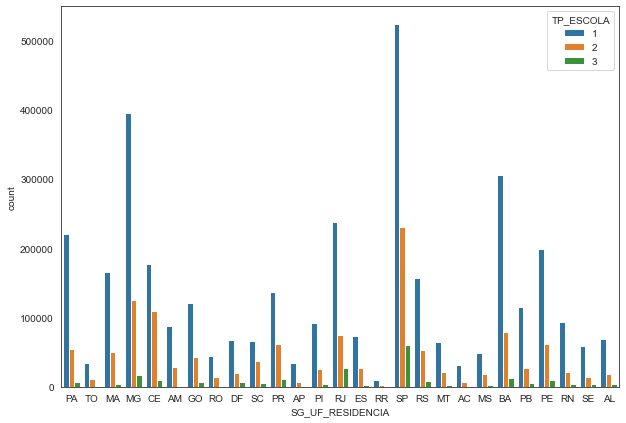

In [24]:
fig, ax = plt.subplots(figsize=(10,7))
sns.countplot(x='SG_UF_RESIDENCIA',hue = 'TP_ESCOLA', data= df_estudo)

- 1 - Não respondeu; 
- 2 - Publica;
- 3 - Privada. 

In [25]:
df_estudo_privado = df_estudo[df_estudo['TP_ESCOLA'] == 3]
#separando o dataframe, selecionando só os candidatos com estudo em escola privada.

In [26]:
df_estudo_privado = df_estudo_privado.groupby('SG_UF_RESIDENCIA').count()
#fazendo a contagem de cantidatos agrupados por Estado

In [27]:
df_estudo_privado.sort_values('TP_ESCOLA')

,TP_ESCOLA
SG_UF_RESIDENCIA,
RR,241
AC,382
RO,585
AP,636
TO,821
AM,1659
MS,2026
MT,2263
ES,3286


São Paulo, Rio de Janeiro e Minas Gerais, são os Estados com maiores numeros de candidatos em ensino privado.

# Qual a média entre os sexos Masculinos e Femininos?

In [28]:
colunas_sexo = ['TP_SEXO', 'Media']
#separando as colunas que vamos utilizar

In [29]:
df_sexo = df.filter(items = colunas_sexo)
#novo dataframe com as colunas selecionadas

In [30]:
transf_sexo = {'M': 'Masculino', 'F': 'Feminino'} 
#dicionario para fazer a substituição

In [31]:
df_sexo['TP_SEXO'] = df_sexo['TP_SEXO'].map(transf_sexo)
#substituição no dataframe 

In [32]:
df_sexo.head()

,TP_SEXO,Media
0,Masculino,517.06
1,Feminino,470.62
2,Feminino,581.40
3,Masculino,NaN
4,Masculino,NaN


In [33]:
df_sexo = df_sexo.dropna()
#Retirando os valores Nulos

In [34]:
df_sexo_count = df_sexo.groupby('TP_SEXO').count()
#contagem do numero de candidatos separados por sexo.

In [35]:
trace_sexo_c = go.Pie(labels = df_sexo_count.index, values = df_sexo_count['Media'])
data_c =[trace_sexo_c]
layout_sexo_c = go.Layout(title = 'Contagem do numero de candidatos por sexo')
fig_sexo_c = go.Figure(data = data_c, layout = layout_sexo_c)
py.iplot(fig_sexo_c)

In [36]:
df_sexo_media = df_sexo.groupby('TP_SEXO').mean()
#agrupando em um novo dataframe a media separadas por sexo.

In [37]:
trace_sexo_p = go.Bar(x = df_sexo_media.index,
               y = df_sexo_media['Media'])
data_p = [trace_sexo_p]
layout = go.Layout(title='Média de notas por sexo')
fig = go.Figure(data=data_p, layout=layout)
py.iplot(fig)

As medias separadas por sexo são bem parecidas.

# Qual a média entre os candidatos separados por Cor/Raça?

In [38]:
colunas_raca = ['TP_COR_RACA', 'Media']
#separando as colunas que vamos utilizar

In [39]:
df_raca = df.filter(items = colunas_raca)
#novo dataframe com as colunas selecionadas

In [40]:
transf_raca = {0: 'Não declarado', 1: 'Branca', 2: 'Preta', 3: 'Parda', 4: 'Amarela', 5: 'Indígena'} 
#dicionario para fazer a substituição

In [41]:
df_raca['TP_COR_RACA'] = df_raca['TP_COR_RACA'].map(transf_raca)
#substituição no dataframe 

In [42]:
df_raca = df_raca.dropna()
#retirando os valores Nulos

In [43]:
df_raca_c = df_raca.groupby('TP_COR_RACA').count()

In [44]:
trace_raca_c = go.Pie(labels = df_raca_c.index, values = df_raca_c['Media'])
data_raca_c =[trace_raca_c]
layout_raca_c = go.Layout(title = 'Contagem do numero de candidatos por cor/raça')
fig_raca_c = go.Figure(data = data_raca_c, layout = layout_raca_c)
py.iplot(fig_raca_c)

In [45]:
df_raca = df_raca.groupby('TP_COR_RACA').mean()
#agrupamento do tipo de cor/raça por media

In [46]:
df_raca = df_raca.sort_values('Media')
#colocando os valores em ordem crescente

In [47]:
df_raca.head()

,Media
TP_COR_RACA,
Indígena,475.602960
Preta,502.296792
Parda,507.314216
Amarela,521.064890
Não declarado,528.527355


In [48]:
trace_raca = go.Bar(x = df_raca.index,
                    y = df_raca['Media'])
data_raca = [trace_raca]
layout_raca = go.Layout(title = 'Media entre Candidatos separados por cor/raça')
fig_raca = go.Figure(data = data_raca, layout = layout_raca)
py.iplot(fig_raca)



A maior media esta na população declarada Branca, e a menor na população declarada Indígena 

# Qual a média entre os candidatos separados por Renda?

In [49]:
colunas_renda = ['Q006','Media']
#Selecionando colunas

In [50]:
df_renda = df.filter(items = colunas_renda)
#Criando dataframe com as colunas selecionadas

In [51]:
df_renda = df_renda.dropna()
#Retirando valores NaN

In [52]:
transf_renda = {'A': 'Nenhuma renda', 
             'B': 'Até 998,00', 
             'C': 'De 998,01 até 1497,00',
             'D': 'De 1497,01 até 1996,00',
             'E': 'De 1996,01 até 2495,00',
             'F': 'De 2495,01 até 2994,00',
             'G': 'De 2994,01 até 3992,00',
             'H': 'De 3992,01 até 4990,00',
             'I': 'De 4990,01 até 5988,00',
             'J': 'De 5988,01 até 6986,00',
             'K': 'De 6986,01 até 7984,00',
             'L': 'De 7984,01 até 8982,00',
             'M': 'De 8982,01 até 9980,00',
             'N': 'De 9980,01 até 11976,00',
             'O': 'De 11976,01 até 14970,00',
             'P': 'De 14970,01 até 19960,00',
             'Q': 'Mais de 19960,00'}

#Dicionario de 'Legendas'

In [53]:
df_renda['Q006'] = df_renda['Q006'].map(transf_renda)
#Substituindo legenda na coluna

In [54]:
df_renda_c = df_renda.groupby('Q006').count()
#agrupando dados

In [55]:
df_renda_c.head()

,Media
Q006,
"Até 998,00",892341
"De 11976,01 até 14970,00",41916
"De 1497,01 até 1996,00",356869
"De 14970,01 até 19960,00",36087
"De 1996,01 até 2495,00",345994


In [56]:
trace_renda_c = go.Pie(labels = df_renda_c.index, values = df_renda_c['Media'])
data_renda_c =[trace_renda_c]
layout_renda_c = go.Layout(title = 'Contagem do numero de candidatos por Renda')
fig_renda_c = go.Figure(data = data_renda_c, layout = layout_renda_c)
py.iplot(fig_renda_c)

In [57]:
df_renda = df_renda.groupby('Q006').mean()
#agrupando dados da Q006 pela media

In [58]:
df_renda = df_renda.sort_values('Media')
#ordendo na ordem crescente por média

In [59]:
df_renda.head(25)

,Media
Q006,
Nenhuma renda,473.013835
"Até 998,00",482.768760
"De 998,01 até 1497,00",503.595496
"De 1497,01 até 1996,00",522.488429
"De 1996,01 até 2495,00",530.426654
"De 2495,01 até 2994,00",546.572815
"De 2994,01 até 3992,00",554.945720
"De 3992,01 até 4990,00",571.253865
"De 4990,01 até 5988,00",579.736522


In [60]:
trace_renda = go.Bar(x = df_renda.index,
                    y = df_renda['Media'])
data_renda = [trace_renda]
layout_renda = go.Layout(title = 'Media entre Candidatos separados por renda')
fig_renda = go.Figure(data = data_renda, layout = layout_renda)
py.iplot(fig_renda)

Quanto maior a renda, maior a media entre os candidatos.

# Qual a média entre os candidatos separados pelo tipo de Escola (Particular, publica ou exterior)?

In [61]:
colunas_escola = ['TP_ESCOLA', 'Media']

In [62]:
df_escola = df.filter(items = colunas_escola)

In [63]:
df_escola.head()

,TP_ESCOLA,Media
0,1,517.06
1,1,470.62
2,3,581.40
3,2,NaN
4,1,NaN


In [64]:
df_escola = df_escola.dropna()

In [65]:
transf_escola = {1: 'Não Respondeu', 2: 'Pública', 3: 'Privada', 4: 'Exterior'}

In [66]:
df_escola['TP_ESCOLA'] = df_escola['TP_ESCOLA'].map(transf_escola)

In [67]:
df_escola_c = df_escola.groupby('TP_ESCOLA').count()

In [68]:
trace_escola_c = go.Pie(labels = df_escola_c.index,
                        values = df_escola_c['Media'])
data_escola_c = [trace_escola_c]
layout_escola_c = go.Layout(title = 'Contagem de Candidatos por tipo de ensino')
fig_escola_c = go.Figure(data = data_escola_c, layout = layout_escola_c)
py.iplot(fig_escola_c)

In [69]:
df_escola = df_escola.groupby('TP_ESCOLA').mean()

In [70]:
df_escola = df_escola.sort_values('Media')

In [71]:
trace_escola = go.Bar(x = df_escola.index,
                    y = df_escola['Media'])
data_escola = [trace_escola]
layout_escola = go.Layout(title = 'Media entre Candidatos separados por tipo de ensino')
fig_escola = go.Figure(data = data_escola, layout = layout_escola)
py.iplot(fig_escola)

A maior media entre os candidatos está na escola Privada

# Qual a média entre os candidatos separados pela escolaridade do pai/Homem responsável?

In [72]:
colunas_pai = ['Q001', 'Media']

In [73]:
df_pai = df.filter(items = colunas_pai)

In [74]:
df_pai = df_pai.dropna()

In [75]:
transf_pai = {'A': 'Nunca estudou',
              'B': 'Não completou a 4ª série/5º ano do Ensino Fundamental',
              'C': 'Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental',
              'D': 'Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio',
              'E': 'Completou o Ensino Médio, mas não completou a Faculdade',
              'F': 'Completou a Faculdade, mas não completou a Pós-graduação',
              'G': 'Completou a Pós-graduação',
              'H': 'Não sei'}

In [76]:
df_pai['Q001'] = df_pai['Q001'].map(transf_pai)

In [77]:
df_pai_c = df_pai.groupby('Q001').count()

In [78]:
df_pai_c.head()

,Media
Q001,
"Completou a 4ª série/5º ano, mas não completou a 8ª série/9º ano do Ensino Fundamental",515785
"Completou a 8ª série/9º ano do Ensino Fundamental, mas não completou o Ensino Médio",433193
"Completou a Faculdade, mas não completou a Pós-graduação",308319
Completou a Pós-graduação,193529
"Completou o Ensino Médio, mas não completou a Faculdade",1006255


In [79]:
trace_pai_c = go.Pie(labels = df_pai_c.index, values = df_pai_c['Media'])
data_pai_c =[trace_pai_c]
layout_pai_c = go.Layout(title = 'Contagem do numero de candidatos por estudo do Pai/Homem responsavel',
                         legend=dict(x=0, y=-0.7))
fig_pai_c = go.Figure(data = data_pai_c, layout = layout_pai_c)
py.iplot(fig_pai_c)

In [80]:
df_pai = df_pai.groupby('Q001').mean()

In [81]:
df_pai = df_pai.sort_values('Media')

In [82]:
trace_pai = go.Bar(x = df_pai.index,
                    y = df_pai['Media'])
data_pai = [trace_pai]
layout_pai = go.Layout(title = 'Media entre Candidatos separados por estudo do Pai/Homem responsável')
fig_pai = go.Figure(data = data_pai, layout = layout_pai)
py.iplot(fig_pai)

# Qual o número de presença e faltas na prova de matematica por estado?

1º dia:
- 45 questões de Linguagens e Códigos
- 45 questões de Ciências Humanas 
- Redação

2º dia:
- 45 questões de Ciências da Natureza 
- 45 questões de Matemática 



In [83]:
coluna_falta = {'SG_UF_RESIDENCIA','TP_PRESENCA_MT'}

In [84]:
df_falta = df.filter(items = coluna_falta)

In [85]:
df_falta.head()

,TP_PRESENCA_MT,SG_UF_RESIDENCIA
0,1,PA
1,1,PA
2,1,PA
3,0,PA
4,0,PA


In [86]:
transf_falta = {0:'Ausente', 1:'Presente'}

In [87]:
df_falta['TP_PRESENCA_MT'] = df_falta['TP_PRESENCA_MT'].map(transf_falta)

In [88]:
df_falta.head()

,TP_PRESENCA_MT,SG_UF_RESIDENCIA
0,Presente,PA
1,Presente,PA
2,Presente,PA
3,Ausente,PA
4,Ausente,PA


In [89]:
df_falta_ausente = df_falta[df_falta['TP_PRESENCA_MT'] == 'Ausente'].groupby('SG_UF_RESIDENCIA').count()

In [90]:
df_falta_ausente = df_falta_ausente.sort_values('TP_PRESENCA_MT')

In [91]:
df_falta_presente = df_falta[df_falta['TP_PRESENCA_MT'] == 'Presente'].groupby('SG_UF_RESIDENCIA').count()

In [92]:
df_falta_presente = df_falta_presente.sort_values('TP_PRESENCA_MT')

In [93]:
trace_falta_ausente = go.Bar(x = df_falta_ausente.index, y = df_falta_ausente['TP_PRESENCA_MT'], name = 'Ausente')
trace_falta_presente = go.Bar(x = df_falta_presente.index, y = df_falta_presente['TP_PRESENCA_MT'], name = 'Presente')
data_falta_ausente = [trace_falta_ausente, trace_falta_presente]
layout_falta_ausente = go.Layout(title = 'TOTAL DE PRESENTE E AUSENTES POR ESTADO')
fig_falta_ausente = go.Figure(data = data_falta_ausente, layout = layout_falta_ausente)
py.iplot(fig_falta_ausente)

In [94]:
grouped = df_falta.groupby(['SG_UF_RESIDENCIA','TP_PRESENCA_MT'])

In [95]:
grouped_pct = grouped['TP_PRESENCA_MT']

In [96]:
grouped_pct.agg('count')

SG_UF_RESIDENCIA  TP_PRESENCA_MT
AC                Ausente            11028
                  Presente           27187
AL                Ausente            22816
                  Presente           68864
AM                Ausente            43246
                  Presente           74810
AP                Ausente            12505
                  Presente           29609
BA                Ausente           108017
                  Presente          289965
CE                Ausente            72985
                  Presente          222780
DF                Ausente            27419
                  Presente           66902
ES                Ausente            29868
                  Presente           72532
GO                Ausente            46125
                  Presente          123952
MA                Ausente            55198
                  Presente          164405
MG                Ausente           144818
                  Presente          393872
MS                Aus

# Analise das notas separados por competências na redação.

In [97]:
colunas_redacao = {'SG_UF_RESIDENCIA','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO'}

In [98]:
df_redacao = df.filter(items = colunas_redacao)

In [99]:
df_redacao.head()

,NU_NOTA_COMP5,NU_NOTA_COMP3,NU_NOTA_COMP2,SG_UF_RESIDENCIA,NU_NOTA_REDACAO,NU_NOTA_COMP1,NU_NOTA_COMP4
0,160.0,160.0,160.0,PA,780.0,160.0,140.0
1,120.0,120.0,120.0,PA,600.0,120.0,120.0
2,120.0,120.0,120.0,PA,640.0,140.0,140.0
3,NaN,NaN,NaN,PA,NaN,NaN,NaN
4,NaN,NaN,NaN,PA,NaN,NaN,NaN


In [100]:
df_redacao = df_redacao.dropna()

In [101]:
df_redacao = df_redacao.groupby('SG_UF_RESIDENCIA').mean()

In [102]:
df_redacao = df_redacao.sort_values('NU_NOTA_REDACAO')

In [103]:
trace_red_med = go.Bar(x = df_redacao.index,
                    y = df_redacao['NU_NOTA_REDACAO'])
data_red_med = [trace_red_med]
layout_red_med = go.Layout(title = 'Media da nota de redação entre Candidatos separados por Estado')
fig_red_med = go.Figure(data = data_red_med, layout = layout_red_med)
py.iplot(fig_red_med)

In [104]:
df_redacao1 = df_redacao.sort_values('NU_NOTA_COMP1')

In [112]:
trace_red_1 = go.Bar(x = df_redacao1.index,
                    y = df_redacao1['NU_NOTA_COMP1'])
data_red_1 = [trace_red_1]
layout_red_1 = go.Layout(title = 'Competência 1 - Demonstrar domínio da modalidade escrita formal da Língua Portuguesa')
fig_red_1 = go.Figure(data = data_red_1, layout = layout_red_1)
py.iplot(fig_red_1)

In [113]:
df_redacao2 = df_redacao.sort_values('NU_NOTA_COMP2')

In [114]:
trace_red_2 = go.Bar(x = df_redacao2.index,
                    y = df_redacao2['NU_NOTA_COMP2'])
data_red_2 = [trace_red_2]
layout_red_2 = go.Layout(title = 'Competência 2 - Compreender a proposta de redação e aplicar conceitos das várias áreas de conhecimento')
fig_red_2 = go.Figure(data = data_red_2, layout = layout_red_2)
py.iplot(fig_red_2)

In [115]:
df_redacao3 = df_redacao.sort_values('NU_NOTA_COMP3')

In [118]:
trace_red_3 = go.Bar(x = df_redacao3.index,
                    y = df_redacao3['NU_NOTA_COMP3'])
data_red_3 = [trace_red_3]
layout_red_3 = go.Layout(title = 'Competência 3 - Selecionar, relacionar, organizar e interpretar informações, fatos, opiniões e argumentos')
fig_red_3 = go.Figure(data = data_red_3, layout = layout_red_3)
py.iplot(fig_red_3)

In [119]:
df_redacao4 = df_redacao.sort_values('NU_NOTA_COMP4')

In [121]:
trace_red_4 = go.Bar(x = df_redacao4.index,
                    y = df_redacao4['NU_NOTA_COMP4'])
data_red_4 = [trace_red_4]
layout_red_4 = go.Layout(title = 'Competência 4 - Demonstrar conhecimento dos mecanismos linguísticos necessários para argumentação')
fig_red_4 = go.Figure(data = data_red_4, layout = layout_red_4)
py.iplot(fig_red_4)

In [125]:
df_redacao5 = df_redacao.sort_values('NU_NOTA_COMP5')

In [127]:
trace_red_5 = go.Bar(x = df_redacao5.index,
                    y = df_redacao5['NU_NOTA_COMP5'])
data_red_5 = [trace_red_5]
layout_red_5 = go.Layout(title = 'Competência 5 - Elaborar proposta de intervenção para o problema abordado, respeitando os direitos humanos')
fig_red_5 = go.Figure(data = data_red_5, layout = layout_red_5)
py.iplot(fig_red_5)